In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Y = [30,27,25,22,25,22,21,20,29,26,23,21,20,24,21,20,19,17,15,12,15,13,11,12, 
     11,22,38,29,37,18,15,29,19,20,21,22,35,22,30,37,37,16,35,27,20,32,33,35, 
     28,19,40,83,72,71,75,66,84,88,95,47,49,40,75,72,73,79,58,52,51,60,66,62, 
     55,50,60,51,45,57,58,49,43,42,70,65,55,53,56,65,75,18,50,53,70,35,16,55,
     68,64,68,69,70,67,71,72,53,58,59,50,59,58,62,67,65,68,60,79,78,92,93,100]

X = [10,11,15,18,15,19,15,18,20,22,25,23,25,24,27,29,30,32,31,33,35,33,38,39, 
     40,42,48,49,47,45,42,45,47,50,51,52,55,52,55,57,54,56,55,57,50,62,63,65, 
     68,69,70,73,72,71,75,76,74,78,75,77,89,70,75,82,83,59,68,77,79,70,56,62, 
     65,60,68,61,65,77,68,69,63,62,70,65,55,53,56,65,75,18,50,53,70,35,16,55,
     78,74,68,69,70,97,61,62,73,78,79,70,99,75,72,77,82,70,71,79,78,82,73,74]

d = {'X_vals':X, 'Y_vals':Y}

df = pd.DataFrame(d)
df

,X_vals,Y_vals
0,10,30
1,11,27
2,15,25
3,18,22
4,15,25
...,...,...
115,79,79
116,78,78
117,82,92
118,73,93


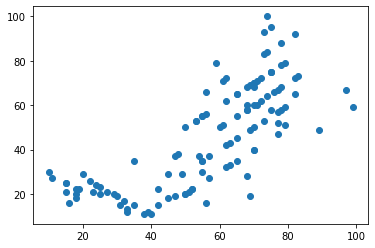

In [3]:
plt.scatter(df['X_vals'], df['Y_vals'])

In [4]:
df.shape

(120, 2)

Coefficients: 
 [0.84152932]
Mean squared error: 232.45
Coefficient of determination: 0.48


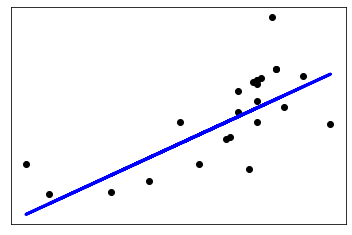

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_val = df[['X_vals']]
y_val = df['Y_vals']

diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(X_val, y_val, test_size=0.2)


from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**MSE IN LINEAR REGRESSION IS VERY HIGH.**

Coefficients: 
 [ 0.00000000e+00 -2.19251525e+00  2.91185587e-02  3.55348213e-04
 -4.20309371e-06]
Mean squared error: 172.61
Coefficient of determination: 0.61


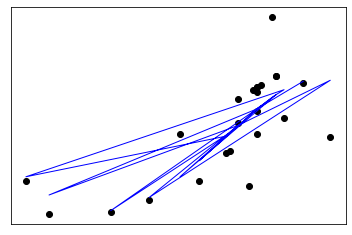

In [7]:
from sklearn.preprocessing import PolynomialFeatures
    
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(diabetes_X_train)   
    
poly.fit(X_poly, diabetes_y_train)

lin2 = LinearRegression()
lin2.fit(X_poly, diabetes_y_train)


# predicting on training data-set
y_train_predicted = lin2.predict(X_poly)

# predicting on test data-set
y_test_predict = lin2.predict(poly.fit_transform(diabetes_X_test))

rmse_train = mean_squared_error(diabetes_y_train, y_train_predicted)
r2_train = r2_score(diabetes_y_train, y_train_predicted)

# evaluating the model on test dataset
rmse_test = mean_squared_error(diabetes_y_test, y_test_predict)
r2_test = r2_score(diabetes_y_test, y_test_predict)


# The coefficients
print('Coefficients: \n', lin2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, y_test_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, y_test_predict))


plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, y_test_predict, color='blue', linewidth=1)


plt.xticks(())
plt.yticks(())

plt.show()

**MSE IN PLOYNOMIAL REGRESSION IS LOW COMPARE TO LINEAR REGRESSION.**